
# Comparando EigenFaces,FisherFaces e LBPH.

## Comparação de pelo Tempo de Execução

In [39]:
#Importando Bibliotecas
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


figure(num=None, figsize=(150, 80), dpi=150, facecolor='w', edgecolor='k')
font = {'family' : 'Sans',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (10,10)


<Figure size 22500x12000 with 0 Axes>

In [96]:
columns = ["QntsIndividuos","QntsPorIndividuo","TamMedPorArquivoGerado","TempMedExecução"]
eigenfaces_file = "eigenfaces.csv"
dt_eigen = pd.read_csv(eigenfaces_file,names=columns)[1:]
dt_eigen.head(40)


,QntsIndividuos,QntsPorIndividuo,TamMedPorArquivoGerado,TempMedExecução
1,1,8,12827806,50.0
2,2,8,12970430,134.45
3,3,8,13011152,263.9
4,4,8,13046291,509.0
5,5,8,13004503,575.21
6,6,8,13064674,767.79
7,7,8,13030980,1026.6
8,8,8,13030827,1286.07
9,9,8,13081867,1281.07
10,10,8,13061691,1544.24


In [131]:
columns = ["QntsIndividuos","QntsPorIndividuo","TamMedPorArquivoGerado","TempMedExecução"]
fisherfaces_file = "fisherfaces.csv"
dt_fisher = pd.read_csv(fisherfaces_file,names=columns)[1:]
dt_fisher.head(5)

,QntsIndividuos,QntsPorIndividuo,TamMedPorArquivoGerado,TempMedExecução
1,2,8,2799.047,68.14
2,3,8,2835.635,126.47
3,4,8,2850.346,201.62
4,5,8,2848.367,240.36
5,6,8,2858.963,332.43


In [121]:
columns = ["QntsIndividuos","QntsPorIndividuo","TamMedPorArquivoGerado","TempMedExecução"]
lbph_file = "lbph.csv"
dt_lbph = pd.read_csv(lbph_file,names=columns)[1:]
dt_lbph.head(5)

,QntsIndividuos,QntsPorIndividuo,TamMedPorArquivoGerado,TempMedExecução
1,1,8,33.418,14.35
2,2,8,66.569,26.27
3,3,8,99.756,39.49
4,4,8,132.932,49.97
5,5,8,166.056,63.05


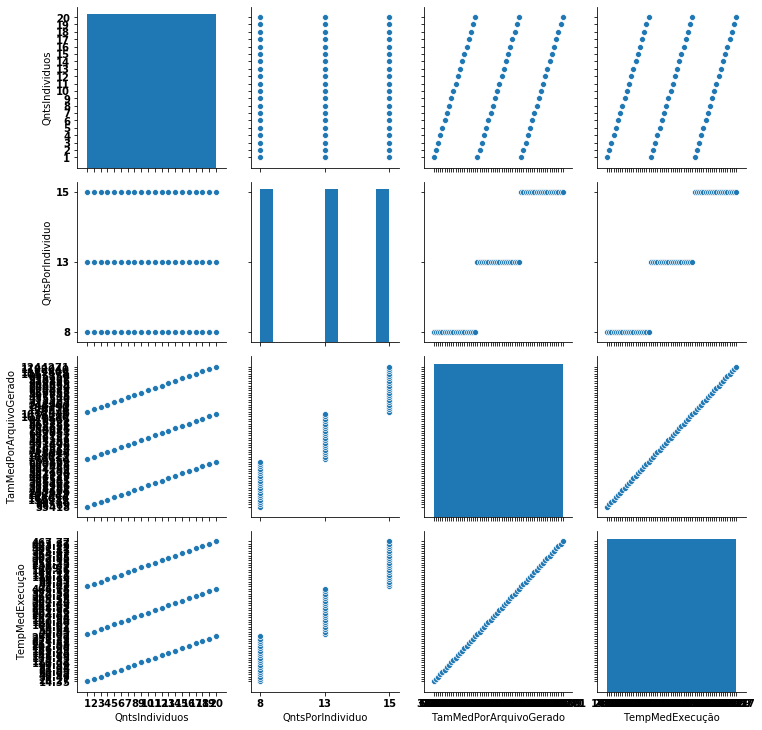

In [5]:
sb.pairplot(dt_lbph,palette='xkcd_rgb')

In [116]:
#Comparando para um dataset de 8 imagens
dt_eigen.head(20)
eigen_8_imagens = dt_eigen.loc[dt_eigen["QntsPorIndividuo"] == "8"].drop(columns=["QntsPorIndividuo"])
eigen_8_imagens.head()

dt_fisher.head(20)
fisher_8_imagens = dt_fisher.loc[dt_fisher["QntsPorIndividuo"] == "8"].drop(columns=["QntsPorIndividuo"])
fisher_8_imagens.head()

dt_lbph.head(20)
lbph_8_imagens = dt_lbph.loc[dt_lbph["QntsPorIndividuo"] == "8"].drop(columns=["QntsPorIndividuo"])
lbph_8_imagens.head()


,QntsIndividuos,TamMedPorArquivoGerado,TempMedExecução
1,1,"33,418",14.35
2,2,"66,569",26.27
3,3,"99,756",39.49
4,4,"132,932",49.97
5,5,"166,056",63.05


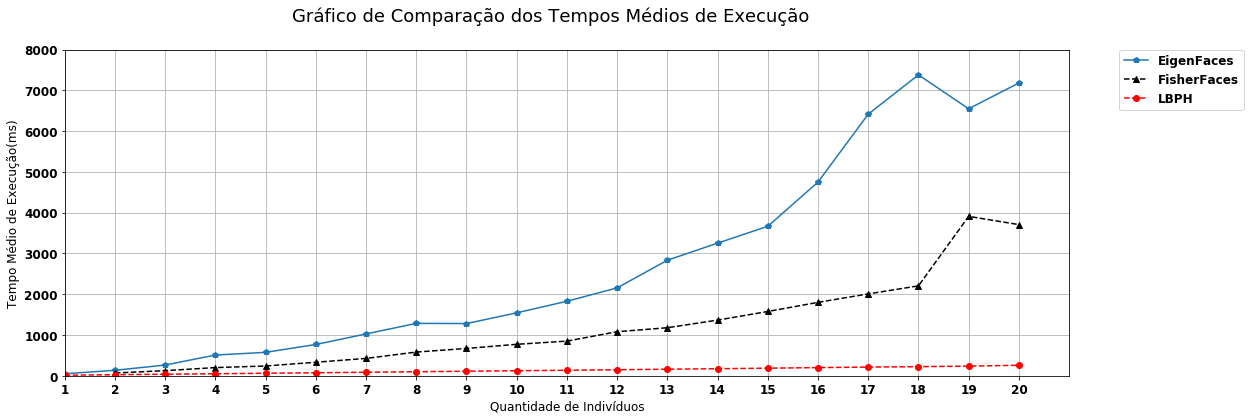

In [117]:
individuos = lbph_8_imagens["QntsIndividuos"]
temposEigen = eigen_8_imagens["TempMedExecução"].apply(pd.to_numeric)
temposLPBH = lbph_8_imagens["TempMedExecução"].apply(pd.to_numeric)
temposFisher = fisher_8_imagens["TempMedExecução"].apply(pd.to_numeric)

plt.axis(xmin=0,xmax=20,ymin=0,ymax=8000)

plt.xlabel('Quantidade de Indivíduos')
plt.ylabel('Tempo Médio de Execução(ms)')

plt.grid()

plt.suptitle("Gráfico de Comparação dos Tempos Médios de Execução",fontsize=18)


plt.plot(individuos,temposEigen,'p-',label = "EigenFaces")
plt.plot(individuos[1:],temposFisher,'k--^',label= "FisherFaces")
plt.plot(individuos,temposLPBH,'ro--',label = "LBPH")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.rcParams['figure.figsize'] = (18,6)


In [118]:
def gera_gráfico_tempo(tam):
    #Comparando para um dataset de 8 imagens
    dt_eigen.head(20)
    eigen_8_imagens = dt_eigen.loc[dt_eigen["QntsPorIndividuo"] == tam].drop(columns=["QntsPorIndividuo"])
    eigen_8_imagens.head()

    dt_fisher.head(20)
    fisher_8_imagens = dt_fisher.loc[dt_fisher["QntsPorIndividuo"] == tam].drop(columns=["QntsPorIndividuo"])
    fisher_8_imagens.head()

    dt_lbph.head(20)
    lbph_8_imagens = dt_lbph.loc[dt_lbph["QntsPorIndividuo"] == tam].drop(columns=["QntsPorIndividuo"])
    lbph_8_imagens.head()
    
    individuos = lbph_8_imagens["QntsIndividuos"]
    temposEigen = eigen_8_imagens["TempMedExecução"].apply(pd.to_numeric)
    temposLPBH = lbph_8_imagens["TempMedExecução"].apply(pd.to_numeric)
    temposFisher = fisher_8_imagens["TempMedExecução"].apply(pd.to_numeric)

    plt.axis(xmin=0,xmax=20,ymin=0,ymax=8000)

    plt.xlabel('Quantidade de Indivíduos')
    plt.ylabel('Tempo Médio de Execução(ms)')

    plt.grid()

    plt.suptitle("Gráfico de Comparação dos Tempos Médios de Execução",fontsize=18)


    plt.plot(individuos,temposEigen,'p-',label = "EigenFaces")
    plt.plot(individuos[1:],temposFisher,'k--^',label= "FisherFaces")
    plt.plot(individuos,temposLPBH,'ro--',label = "LBPH")
    plt.legend(bbox_to_anchor=(0.001, 0.99), loc='upper left', borderaxespad=0.)

    plt.rcParams['figure.figsize'] = (18,6)



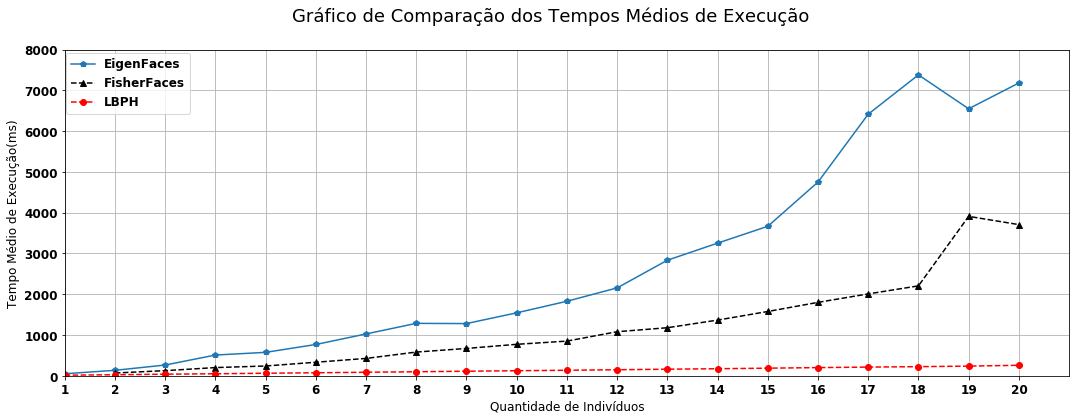

In [89]:
gera_gráfico_tempo("8")

In [137]:
def gera_gráfico_espaco(tam):
    #Comparando para um dataset de 8 imagens
    dt_eigen.head(20)
    eigen_8_imagens = dt_eigen.loc[dt_eigen["QntsPorIndividuo"] == tam].drop(columns=["QntsPorIndividuo"])
    eigen_8_imagens.head()

    dt_fisher.head(20)
    fisher_8_imagens = dt_fisher.loc[dt_fisher["QntsPorIndividuo"] == tam].drop(columns=["QntsPorIndividuo"])
    fisher_8_imagens.head()

    dt_lbph.head(20)
    lbph_8_imagens = dt_lbph.loc[dt_lbph["QntsPorIndividuo"] == tam].drop(columns=["QntsPorIndividuo"])
    lbph_8_imagens.head()
    
    individuos = lbph_8_imagens["QntsIndividuos"]
    temposEigen = eigen_8_imagens["TamMedPorArquivoGerado"].apply(pd.to_numeric)
    temposLPBH = lbph_8_imagens["TamMedPorArquivoGerado"].apply(pd.to_numeric)
    temposFisher = fisher_8_imagens["TamMedPorArquivoGerado"].apply(pd.to_numeric)

    #plt.axis(xmin=0,xmax=20,ymin=0,ymax=10)

    plt.xlabel('Quantidade de Indivíduos')
    plt.ylabel('Tamanho Médio do Arquivo em Bytes')

    plt.grid()

    plt.suptitle("Gráfico de Comparação dos Tamanho Médio dos Arquivos",fontsize=18)


    plt.plot(individuos,temposEigen,'p-',label = "EigenFaces")
    plt.plot(individuos[1:],temposFisher,'k--^',label= "FisherFaces")
    plt.plot(individuos,temposLPBH,'ro--',label = "LBPH")
    plt.legend(bbox_to_anchor=(0.001, 0.99), loc='upper left', borderaxespad=0.)

    plt.rcParams['figure.figsize'] = (18,6)



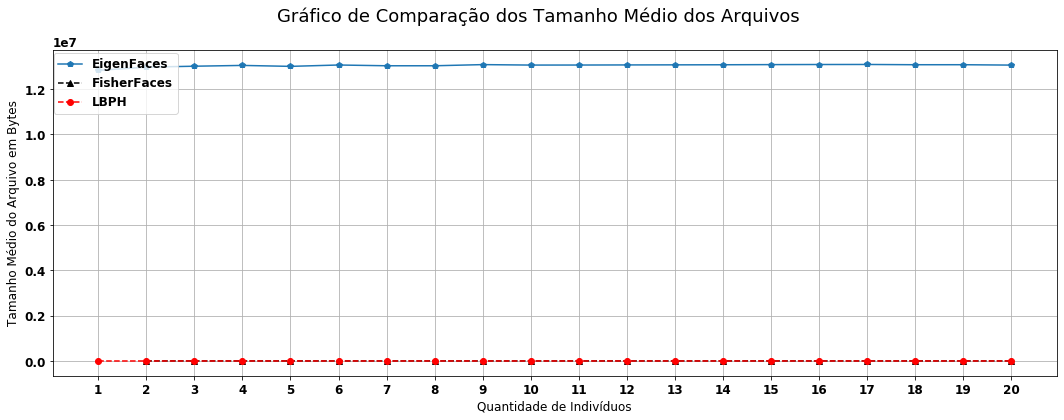

In [138]:
gera_gráfico_espaco("8")